In [ ]:
##importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading Data from csv format

In [ ]:
df = pd.read_csv("heart.csv")
print(df.head())
print("--------------------------------------------------------------------------------------")
print(df.info())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
--------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column    

In [7]:
# Data preprocessing

In [8]:
# change feature sex M->1 F->0

In [ ]:
df["Sex"] = df["Sex"].astype(str).str.strip().str.upper()
df["Sex"] = df["Sex"].map({'M': 1, 'F': 0})
print(df.head())

In [9]:
#change Feature ChestPainType to ['ATA' 'NAP' 'ASY' 'TA'] - One-Hot Encoding 

In [10]:
# مقادیر مختلفی که این فیچر در این دیتا ست دارد
print(df['ChestPainType'].unique())

# در صورتی که مقادیر فیچر فاصله یا حرف کوچک داشته باشد اصلاح می شود
df['ChestPainType'] = df['ChestPainType'].astype(str).str.strip().str.upper()

# ساخت ستون جدید برای هر مقدار
for val in df['ChestPainType'].unique():
    df[f'ChestPainType_{val}'] = (df['ChestPainType'] == val).astype(int)

# حذف ستونی که با روش هات وان به ستون های دیگه شکسته شده
df.drop('ChestPainType', axis=1, inplace=True)

print(df.head())


['ATA' 'NAP' 'ASY' 'TA']
   Age  Sex  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40    1        140          289          0     Normal    172   
1   49    0        160          180          0     Normal    156   
2   37    1        130          283          0         ST     98   
3   48    0        138          214          0     Normal    108   
4   54    1        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  ChestPainType_ATA  \
0              N      0.0       Up             0                  1   
1              N      1.0     Flat             1                  0   
2              N      0.0       Up             0                  1   
3              Y      1.5     Flat             1                  0   
4              N      0.0       Up             0                  0   

   ChestPainType_NAP  ChestPainType_ASY  ChestPainType_TA  
0                  0                  0                 0  
1                  

In [11]:
#change Feature RestingECG to ['Normal' 'ST' 'LVH'] - One-Hot Encoding

In [12]:
print(df['RestingECG'].unique())

df['RestingECG'] = df['RestingECG'].astype(str).str.strip().str.upper()

for val in df['RestingECG'].unique():
    df[f'RestingECG_{val}'] = (df['RestingECG'] == val).astype(int)

df.drop('RestingECG', axis=1, inplace=True)

# چک نتیجه
print(df.head())

['Normal' 'ST' 'LVH']
   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR ExerciseAngina  Oldpeak  \
0   40    1        140          289          0    172              N      0.0   
1   49    0        160          180          0    156              N      1.0   
2   37    1        130          283          0     98              N      0.0   
3   48    0        138          214          0    108              Y      1.5   
4   54    1        150          195          0    122              N      0.0   

  ST_Slope  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0       Up             0                  1                  0   
1     Flat             1                  0                  1   
2       Up             0                  1                  0   
3     Flat             1                  0                  0   
4       Up             0                  0                  1   

   ChestPainType_ASY  ChestPainType_TA  RestingECG_NORMAL  RestingECG_ST  \
0                 

In [13]:
# change feature ExerciseAngina Y->1 N->0

In [14]:
df["ExerciseAngina"] = df["ExerciseAngina"].astype(str).str.strip().str.upper()
df["ExerciseAngina"] = df["ExerciseAngina"].map({'Y': 1, 'N': 0})
print(df.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak ST_Slope  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0       Up             0                  1                  0   
1      1.0     Flat             1                  0                  1   
2      0.0       Up             0                  1                  0   
3      1.5     Flat             1                  0                  0   
4      0.0       Up             0                  0                  1   

   ChestPainType_ASY  ChestPainType_TA  RestingECG_NORMAL  RestingECG_ST  \
0                  0              

In [15]:
#change Feature ST_Slope to ['Up' 'Flat' 'Down'] - One-Hot Encoding

In [16]:
print(df['ST_Slope'].unique())

df['ST_Slope'] = df['ST_Slope'].astype(str).str.strip().str.upper()

for val in df['ST_Slope'].unique():
    df[f'ST_Slope_{val}'] = (df['ST_Slope'] == val).astype(int)

df.drop('ST_Slope', axis=1, inplace=True)

print(df.head())

['Up' 'Flat' 'Down']
   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0             0                  1                  0   
1      1.0             1                  0                  1   
2      0.0             0                  1                  0   
3      1.5             1                  0                  0   
4      0.0             0                  0                  1   

   ChestPainType_ASY  ChestPainType_TA  RestingECG_NORMAL  RestingECG_ST  \
0                  0                 0                  1          

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    int64  
 10  ChestPainType_NAP  918 non-null    int64  
 11  ChestPainType_ASY  918 non-null    int64  
 12  ChestPainType_TA   918 non-null    int64  
 13  RestingECG_NORMAL  918 non-null    int64  
 14  RestingECG_ST      918 non-null    int64  
 15  RestingECG_LVH     918 non-null    int64  
 16  ST_Slope_UP        918 non

In [18]:
# extract features from labels

In [19]:
# X: ماتریس ورودی‌ها (918 سطر × 18 ستون)
X = df.drop('HeartDisease', axis=1).values  

# Y: بردار خروجی (918 سطر × 1)
Y = df['HeartDisease'].values.reshape(-1,1) 
# print("x : ",X)
# print("Y : ",Y)
print(X.shape)
print(Y.shape)

(918, 18)
(918, 1)


In [20]:
# Normalization Data - z_score

In [21]:
# میانگین و انحراف معیار برای هر ستون

# میانگین هر فیچر
X_mean = X.mean(axis=0) 

# انحراف معیار هر فیچر
X_std = X.std(axis=0)    

# جلوگیری از تقسیم بر صفر
X_std[X_std == 0] = 1

# نرمال‌سازی
X = (X - X_mean) / X_std

print(X[0])
print(X_std.shape)
print(X.shape)

[-1.4331398   0.51595242  0.41090889  0.82507026 -0.55134134  1.38292822
 -0.8235563  -0.83243239  2.07517671 -0.53283777 -1.08413811 -0.22967867
  0.81427482 -0.49044933 -0.50747832  1.15067399 -1.00218103 -0.27144836]
(18,)
(918, 18)


In [22]:
# Split Data to TrainSet and TestSet

In [23]:
np.random.seed(42)                 # برای reproducibility
indices = np.arange(X.shape[0])    # آرایه‌ای از 0 تا 917
np.random.shuffle(indices)         # شافل کردن ایندکس‌ها

split = int(0.8 * X.shape[0])      
train_idx, test_idx = indices[:split], indices[split:]

# تقسیم داده
X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]


In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(734, 18)
(734, 1)
(184, 18)
(184, 1)


In [25]:
# Enter number of hidden layer and sells in layers

In [26]:
learning_rate = float(input("Enter LearningRate : "))
num_epochs = int(input("Enter numbert of epochs : "))
num_hidden = int(input("Enter Number of Hidden Layers : "))


hidden_layers = []
for i in range(num_hidden):
    n = int(input(f"Enter number of neurons in hidden layer {i+1} : "))
    hidden_layers.append(n)

layers = [18] + hidden_layers + [1]

print("Network Layers structure : ",layers)
    
    

Enter LearningRate :  0.01
Enter numbert of epochs :  50
Enter Number of Hidden Layers :  2
Enter number of neurons in hidden layer 1 :  10
Enter number of neurons in hidden layer 2 :  8


Network Layers structure :  [18, 10, 8, 1]


In [27]:
# make weighs and biases

In [28]:
np.random.seed(42)

weights = []
biases = []

for i in range(len(layers)-1):
    w = np.random.randn(layers[i],layers[i+1]) * 1
    b = np.zeros((1,layers[i+1]))
    weights.append(w)
    biases.append(b)

for i in range(len(weights)):
    print(f"Layer {i} → {i+1}: W shape = {weights[i].shape}, b shape = {biases[i].shape}")
    


Layer 0 → 1: W shape = (18, 10), b shape = (1, 10)
Layer 1 → 2: W shape = (10, 8), b shape = (1, 8)
Layer 2 → 3: W shape = (8, 1), b shape = (1, 1)


In [29]:
# functions 

In [30]:
# sigmoid
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [31]:
 # accuracy for each epoch
def accuracy(X, Y):
    correct = 0
    for x, y_true in zip(X, Y):
        a = x.reshape(1, -1)
        for W, b in zip(weights, biases):
            a = sigmoid(np.dot(a, W) + b)
        y_pred = (a > 0.5).astype(int)
        if y_pred == y_true:
            correct += 1
    return correct / len(X)

In [32]:
# main core of mlp

In [33]:
# lists for saving train and test history
train_acc_history = []
test_acc_history = []

In [34]:
for epo in range (num_epochs):
    # stotastic learning
    for x_train,y_true in zip(X_train , Y_train):
        # reshape x , y to (1,m)
        A = x_train.reshape(1, -1) # (1,18)
        y_true = y_true.reshape(1, -1) #(1,1)
        # --------------------------------------------------- 1 feed forward ----------------------------------------------
        cache = {'A0': A}
        for idx , (W , B) in enumerate (zip(weights, biases), 1):
            Z = (A @ W) + B
            A = sigmoid(Z)
            cache[f"Z{idx}"] = Z
            cache[f"A{idx}"] = A    
        #--------------------------------------------------- 2 BackPropagation ---------------------------------------------
        # -------------------------------------------------- 2-1 Calculate Delta -------------------------------------------
        
        #--------Calculate Delta for out layer
        A = cache['A' + str(len(weights))]
        delta =  A*(1-A)*(y_true - A)
        cache["delta_"+str(len(weights))] = delta
        
        #------------Calculate Delta for hidden layers
        for i in range (len(weights)-1 , 0 , -1):
            A = cache["A" + str(i)]
            delta_next = cache["delta_"+str(i+1)]
            W = weights[i]
            delta = (A.T * (1 - A.T)) * (W @ delta_next)
            cache["delta_" + str(i)] = delta
        # -------------------------------------------------2-2 update weights and biases -----------------------------------------
        for i in range (len(weights)):
            delta_next = cache["delta_" + str(i+1)]
            A = cache['A' + str(i)]
            dw = delta_next @ A
            weights[i] = weights[i] + learning_rate * dw.T
            biases [i] = biases[i] + learning_rate * delta_next.T

    print("epoch ",epo+1 ," compelited")
   
    train_acc = accuracy(X_train, Y_train)
    test_acc = accuracy(X_test, Y_test)
    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)        

epoch  1  compelited
epoch  2  compelited
epoch  3  compelited
epoch  4  compelited
epoch  5  compelited
epoch  6  compelited
epoch  7  compelited
epoch  8  compelited
epoch  9  compelited
epoch  10  compelited
epoch  11  compelited
epoch  12  compelited
epoch  13  compelited
epoch  14  compelited
epoch  15  compelited
epoch  16  compelited
epoch  17  compelited
epoch  18  compelited
epoch  19  compelited
epoch  20  compelited
epoch  21  compelited
epoch  22  compelited
epoch  23  compelited
epoch  24  compelited
epoch  25  compelited
epoch  26  compelited
epoch  27  compelited
epoch  28  compelited
epoch  29  compelited
epoch  30  compelited
epoch  31  compelited
epoch  32  compelited
epoch  33  compelited
epoch  34  compelited
epoch  35  compelited
epoch  36  compelited
epoch  37  compelited
epoch  38  compelited
epoch  39  compelited
epoch  40  compelited
epoch  41  compelited
epoch  42  compelited
epoch  43  compelited
epoch  44  compelited
epoch  45  compelited
epoch  46  compelit

In [35]:
print(cache.keys())
for i in range(len(weights)):
    print(f"Layer {i} → {i+1}: W shape = {weights[i].shape}, b shape = {biases[i].shape}")

dict_keys(['A0', 'Z1', 'A1', 'Z2', 'A2', 'Z3', 'A3', 'delta_3', 'delta_2', 'delta_1'])
Layer 0 → 1: W shape = (18, 10), b shape = (1, 10)
Layer 1 → 2: W shape = (10, 8), b shape = (1, 8)
Layer 2 → 3: W shape = (8, 1), b shape = (1, 1)


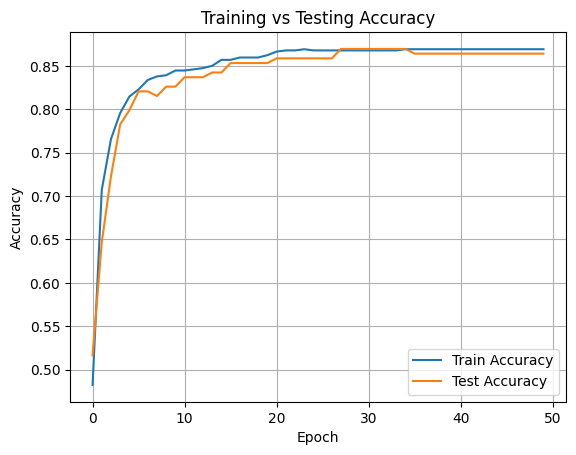

In [36]:
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(test_acc_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import os, pickle, json, numpy as np

os.makedirs("model", exist_ok=True)

model_data = {
    #  لیست numpy arrays
    "weights": weights,
    # لیست numpy arrays
    "biases": biases,    
    "X_mean": X_mean,
    "X_std": X_std
}

with open("model/heart_mlp_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

# ذخیره ترتیب ستون های ورودی
feature_names = list(df.drop('HeartDisease', axis=1).columns)
with open("model/feature_names.json", "w", encoding="utf-8") as f:
    json.dump(feature_names, f, ensure_ascii=False, indent=2)

print("Saved model to model/heart_mlp_model.pkl")
print("Saved feature names to model/feature_names.json")
print("Features (order):")
print(feature_names)
print("Model saved. Feature count:", len(feature_names))


Saved model to model/heart_mlp_model.pkl
Saved feature names to model/feature_names.json
Features (order):
['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_ASY', 'ChestPainType_TA', 'RestingECG_NORMAL', 'RestingECG_ST', 'RestingECG_LVH', 'ST_Slope_UP', 'ST_Slope_FLAT', 'ST_Slope_DOWN']
Model saved. Feature count: 18
